## Figures for the presentation

Simple features overlap in 

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [22]:
genres = ["classical", "electronic", "pop", "rock"]

ZC = np.load('../preprocessing/zeroCrossings_frame100ms_hop50ms.npy')
SC = np.load('../preprocessing/spectralCentroid_frame100ms_hop50ms.npy')
SV = np.load('../preprocessing/spectralVariance_frame5000ms_hop2500ms.npy')
ST = np.load('../preprocessing/staticTempoLibrosa.npy')


labels = pd.read_csv('../preprocessing/labels.csv')
# Only keep the emotion labels
# These correspond to the average number each specific emotion was reported

# For classifying we threshold these averages at 0.5.
# Average > 0.5: this emotion corresponds to this song
# Average < 0.5: emotion does not belong to this song

labels = labels.drop(['var_amazement',
                      'var_solemnity',
                      'var_tenderness',
                      'var_nostalgia',
                      'var_calmness',
                      'var_power',
                      'var_joyful_activation',
                      'var_tension',
                      'var_sadness',
                      'mood',
                      'var_mood',
                      'liked',
                      'var_liked',
                      'disliked',
                      'var_disliked',
                      'age',
                      'var_age',
                      'gender',
                      'var_gender',
                      'number_of_observations',
                      'track id'
                      ], axis=1)

emotions = list(labels)

features_dict = {'Zero crossings': np.nanmedian(ZC, axis=1),
                 'Spectral centroid': np.nanmedian(SC, axis=1),
                 'Spectral variance': np.nanmedian(SV, axis=1),
                 'Tempo': ST}
features = pd.DataFrame(data=features_dict)


labels = pd.DataFrame(labels)

In [23]:
cat = ['genre']

labels = labels.reset_index(drop=True)
df = pd.concat([features, labels[cat]], axis=1)

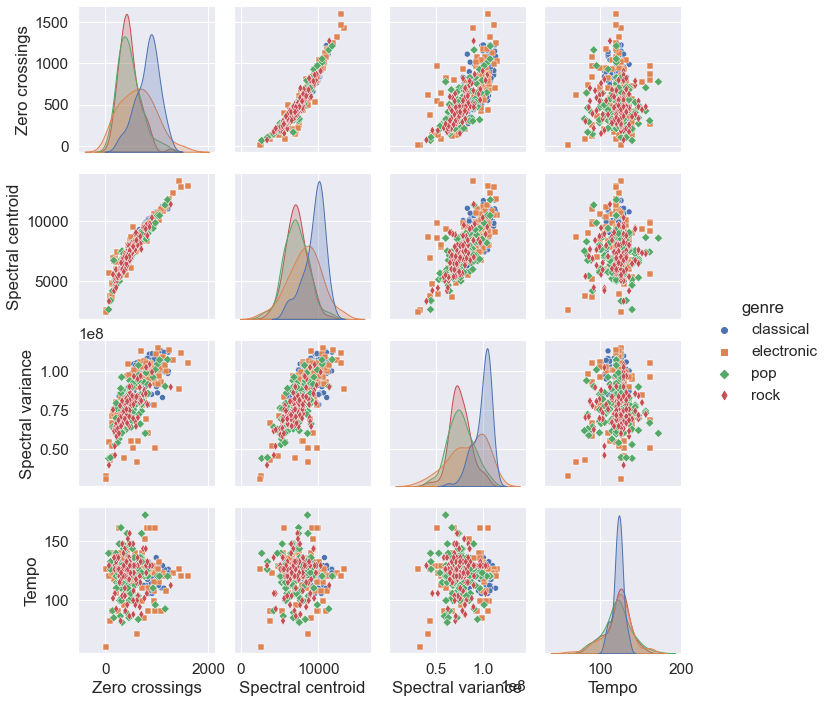

In [26]:
sns.set(font_scale=1.4)  
plot = sns.pairplot(df, hue=cat[0], markers=["o", "s", "D", 'd'])
plot.savefig("pairplotSimpleFeatures")

# ___________________

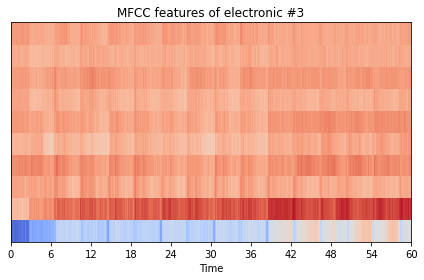

In [23]:
import librosa 
import librosa.display
import matplotlib.pyplot as plt
   
y, sr = librosa.load('../data/emotifymusic/electronic/3.mp3', sr=44100)
win_length = int(0.025*sr)
hop_length = int(0.010*sr)
mfcc = librosa.feature.mfcc(y, sr=sr, n_mfcc=10,
            n_fft=8192,
            win_length=win_length, 
            hop_length=hop_length)
fig, ax = plt.subplots()
librosa.display.specshow(mfcc,x_axis='time',ax=ax, sr=sr)
ax.set_xlim(left=0, right=60)
plt.title('MFCC features of electronic #3')
plt.tight_layout()
plt.savefig('MFCC_Electronic3.png')